In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [3]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'kg', 'mood', 'rm',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+',
       '8a'],
      dtype='object')

In [4]:
sessions.head()

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9,6a,6b+,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9,5c,6b+,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6,6b,6b+,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5,6b,6b,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5,5c,6a+,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 45,
    '6c+': 50,
    '7a': 80,
    '7a+': 90,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [6]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,9,6a,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9,5c,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,6,6b,6b+,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,508.25
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,5,6b,6b,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,430.00
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5,5c,6a+,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,78.0,0.0,6,6b,6b+,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,619.50
6,2018-02-04,doripa,1,project,bb1,78.0,0.0,4,6b,6c+,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.50
7,2018-04-04,doripa,1,project,bf,78.0,0.0,4,6b,6c,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.00
8,2018-06-04,doripa,1,arc,bf,78.0,0.0,2,5c,5c,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,78.0,0.0,5,6b,6c+,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984.00


In [7]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

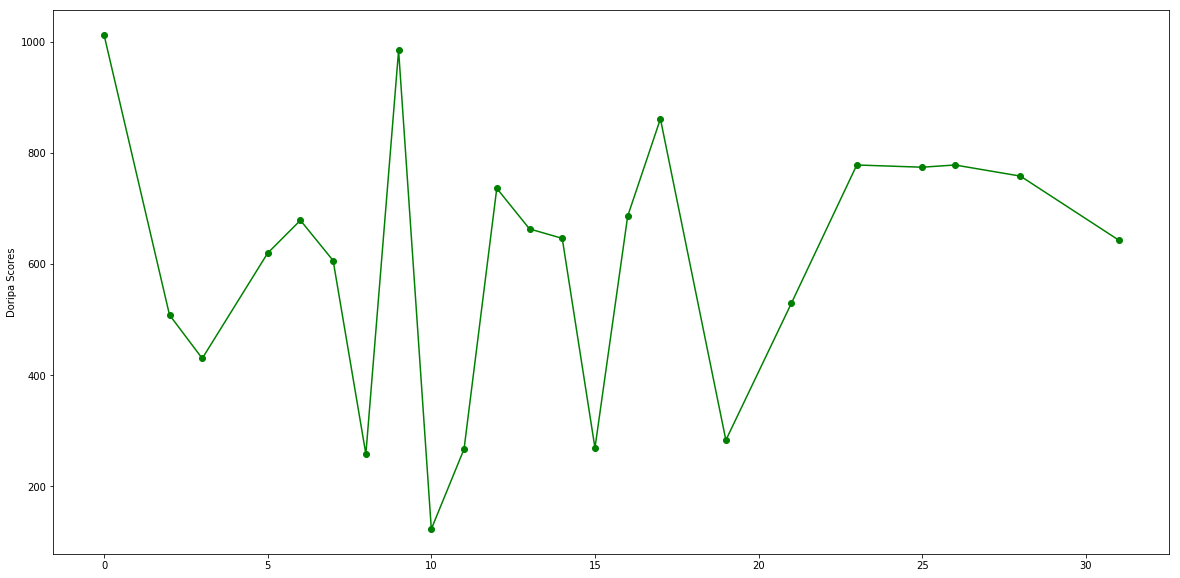

In [8]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [9]:
sunshine_sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,9,5c,6b+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,5,5c,6a+,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,59.0,0.0,6,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,59.0,6.0,6,5a,5c,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,59.0,7.0,6,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
24,2018-06-05,sunshine,2,base,bb2,59.0,7.0,7,5b,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
27,2018-08-05,sunshine,2,base,bb2,59.0,7.0,6,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0
29,2018-11-05,sunshine,2,base,bb1,59.0,4.0,7,5c,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
30,2018-05-16,sunshine,2,base,bb2,59.0,3.0,6,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0


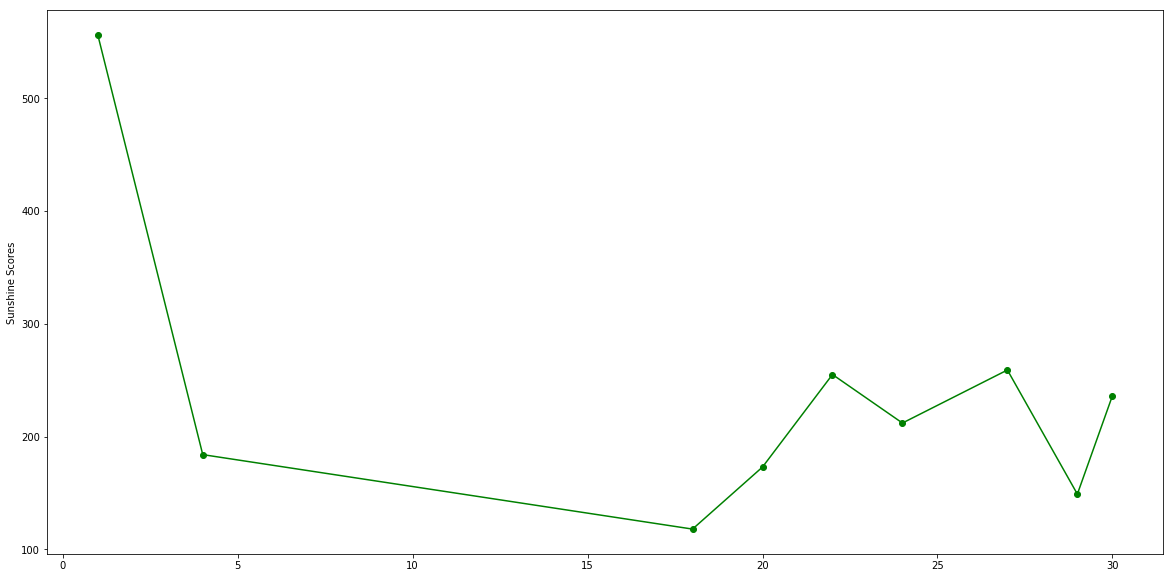

In [10]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

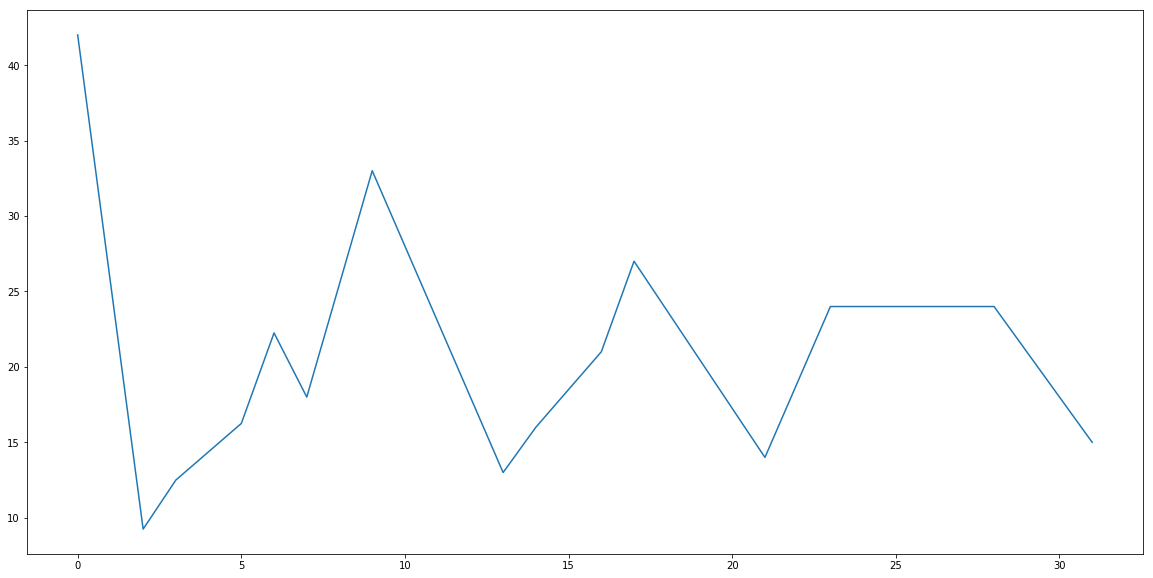

In [11]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

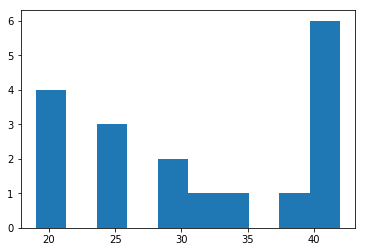

In [12]:
plt.hist(no_arcing['total'])
plt.show()

In [13]:
doripa.corr()

,cycle,kg,mood,rm,total,total6,4,5a,5b,5c,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
cycle,1.000000,-0.571086,0.782002,0.091089,0.396225,0.225180,0.483046,0.078787,0.019037,0.053244,...,0.187871,-0.212587,-0.225374,-0.081894,NaN,NaN,NaN,NaN,NaN,0.250005
kg,-0.571086,1.000000,-0.793226,-0.347189,-0.444825,-0.226920,-0.830904,-0.211985,0.103620,0.034242,...,-0.168352,0.280968,0.106786,0.173318,NaN,NaN,NaN,NaN,NaN,-0.261281
mood,0.782002,-0.793226,1.000000,0.179817,0.499558,0.197601,0.665327,0.308130,0.020629,0.085166,...,0.139507,-0.384735,-0.178490,-0.123212,NaN,NaN,NaN,NaN,NaN,0.226029
rm,0.091089,-0.347189,0.179817,1.000000,0.335308,0.712125,0.330002,-0.419445,-0.573555,-0.618035,...,0.327070,0.243992,0.191062,0.138223,NaN,NaN,NaN,NaN,NaN,0.743961
total,0.396225,-0.444825,0.499558,0.335308,1.000000,0.579133,0.335930,0.386862,0.093786,0.169285,...,0.183170,-0.099477,-0.464357,-0.365276,NaN,NaN,NaN,NaN,NaN,0.572406
total6,0.225180,-0.226920,0.197601,0.712125,0.579133,1.000000,0.167986,-0.457704,-0.665564,-0.622117,...,0.417315,0.316965,-0.028177,-0.159486,NaN,NaN,NaN,NaN,NaN,0.964349
4,0.483046,-0.830904,0.665327,0.330002,0.335930,0.167986,1.000000,0.122427,-0.096557,-0.149054,...,0.090750,-0.237653,-0.051959,-0.146599,NaN,NaN,NaN,NaN,NaN,0.201004
5a,0.078787,-0.211985,0.308130,-0.419445,0.386862,-0.457704,0.122427,1.000000,0.666152,0.760417,...,-0.220746,-0.466029,-0.513384,-0.136552,NaN,NaN,NaN,NaN,NaN,-0.445472
5b,0.019037,0.103620,0.020629,-0.573555,0.093786,-0.665564,-0.096557,0.666152,1.000000,0.808568,...,-0.377228,-0.268172,-0.420047,-0.105442,NaN,NaN,NaN,NaN,NaN,-0.661060
5c,0.053244,0.034242,0.085166,-0.618035,0.169285,-0.622117,-0.149054,0.760417,0.808568,1.000000,...,-0.250615,-0.395905,-0.308095,-0.320239,NaN,NaN,NaN,NaN,NaN,-0.599256


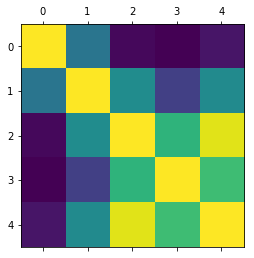

In [14]:
plt.matshow(doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr());

In [15]:
doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr()

,mood,total,total6,rm,scores
mood,1.000000,0.499558,0.197601,0.179817,0.226029
total,0.499558,1.000000,0.579133,0.335308,0.572406
total6,0.197601,0.579133,1.000000,0.712125,0.964349
rm,0.179817,0.335308,0.712125,1.000000,0.743961
scores,0.226029,0.572406,0.964349,0.743961,1.000000


In [16]:
doripa['total'].corr(doripa['total6'])

0.57913271903110042

In [17]:
doripa['total'].corr(doripa['scores'])

0.57240574978564052

In [18]:
doripa['scores'].corr(doripa['rm'])

0.74396076068080363

In [19]:
doripa['scores'].corr(doripa['total6'])

0.964348615571885

In [20]:
sunshine_sessions.corr()['scores']

cycle    -0.582614
kg        0.582614
mood     -0.206139
rm        0.768774
total     0.923962
total6    0.979403
4        -0.387744
5a        0.757379
5b        0.816750
5c        0.266888
6a        0.836404
6a+       0.656395
6b        0.300700
6b+       0.653626
6c        0.083861
6c+            NaN
7a       -0.157648
7a+            NaN
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64

In [21]:
doripa.corr()['scores']

cycle     0.250005
kg       -0.261281
mood      0.226029
rm        0.743961
total     0.572406
total6    0.964349
4         0.201004
5a       -0.445472
5b       -0.661060
5c       -0.599256
6a        0.805527
6a+       0.743925
6b        0.721427
6b+       0.658091
6c        0.490617
6c+       0.366098
7a        0.109306
7a+      -0.073874
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64